In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio
import pandas as pd

## 1

In [2]:
X = np.array([[0,1,0,1], [3,3,1,1], [1,1,1,1]]).T
y = np.array([1,1,0,0])
w = np.array([-2,1,0])
lambd = .07

In [3]:
def s(X, w):
    
    return sigmoid(X,w) * (1 - sigmoid(X,w)) * np.eye(X.shape[0])

def sigmoid(X, w):
    
    return 1 / (1 + np.exp(- X @ w))
    
    
def e(X, w, lambd):
    
    return np.linalg.inv(2 * lambd + X.T @ s(X, w) @ X) @ (X.T @ (sigmoid(X,w) - y) - 2 * lambd * w)

def update(X, w, lambd):
    
    w = e(X,w,lambd) + w
    return w

### 1.4

#### (a)

In [4]:
sigmoid(X, w)

array([0.95257413, 0.73105858, 0.73105858, 0.26894142])

#### (b)

In [5]:
w = update(X, w, lambd)
w

array([-2.50536624, -0.75635058,  4.08203851])

#### (c)

In [6]:
sigmoid(X, w)

array([0.85972246, 0.33350396, 0.96529962, 0.69430462])

#### (d)

In [7]:
w = update(X, w, lambd)
w

array([-2.52693901, -2.41320625,  7.70142503])

## 4

In [8]:
def split(data, size):
    from math import floor
    
    dat = data.copy()
    
    # for reproducibility
    np.random.seed(24)
    
    # shuffle copied data
    np.random.shuffle(dat)
    
    if type(size) == float:
        size = floor(len(dat) * size)

    # training_data, validation_data, training_label, validation_label
    return dat[size:, :-1], dat[:size, :-1], dat[size:, -1], dat[:size, -1]

def sigmoid(r):

    return scipy.special.expit(r)
    
    
def loss(X, w, y, lambd):
    
    r = X @ w
    
    t = 3
    
    u1 = -scipy.log(1 + scipy.exp(-r))
    u2 = scipy.log(1 - sigmoid(r))
    
    u1[r > t] = 0
    u2[r < -t] = 0
    
    ret = (np.dot(y, u1) + np.dot((1 - y), u2)) / X.shape[0]

    return lambd * np.dot(w,w) - ret
    


def deriv(X, w, y, lambd):
    
    return 2 * lambd * w + (X.T @ (sigmoid(X @ w) - y)) / X.shape[0]


def check_accuracy(pred, y):
    
    return np.round(sum(pred == y) / len(y), 5)


def predict(X, w):
    
    return sigmoid(X@w) >= .5


def batch_train(X, y, epochs, learning_rate, lambd, ver_iter=50):
    
    w = np.zeros(X.shape[1])

    loss_history = []
    acc_history = []
    
    for i in range(epochs):
        
        l = loss(X, w, y, lambd)

        pred = predict(X, w)

        w  = w - learning_rate * deriv(X, w, y, lambd)

        if ver_iter is not None and i % ver_iter == 0:
        
            print(f'Epoch : {int(i+ver_iter)}, Loss : {l}')
            
        loss_history.append(l)
        
    
    return loss_history, w



def sgd_train(X, y, epochs, learning_rate, lambd, ver_iter=50):
    
    w = np.zeros(X.shape[1])

    loss_history = []
    acc_history = []
    
    n = X.shape[0]
    
    for i in range(epochs):
        cost = 0
        
        for j in range(n):

            p = np.random.randint(0, n)

            dat = X[[p]]
            lab = y[[p]]

            d = deriv(dat, w, lab, lambd) / n
            w  = w - learning_rate * d

            cost += loss(dat, w, lab, lambd)
            
        cost = cost / n
        
        loss_history.append(cost)

            
        if ver_iter is not None and i % ver_iter == 0:
        
            print(f'Epoch : {int(i+ver_iter)}, Loss : {cost}')
            
        
    pred = predict(X_val, w)
    
    return loss_history, w

In [27]:
dat = sio.loadmat('./data.mat')

train_data = dat['X']
labels = dat['y']

data = np.hstack((train_data, labels))

X_train, X_test, y_train, y_test = split(data, 600)

X_train, X_val, y_train, y_val = split(np.hstack((X_train, y_train.reshape(-1, 1))), 500)

In [10]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((4900, 12), (4900,), (500, 12), (500,))

#### 1

In [11]:
lambd = .01
learning_rate = 8e-4
epochs = 10000
ver_iter = epochs * .1


loss_history, w = batch_train(X_train, y_train, epochs, learning_rate, lambd, ver_iter)

Epoch : 1000, Loss : 0.6931471805599455
Epoch : 2000, Loss : 0.2003099948534916
Epoch : 3000, Loss : 0.19154084225883072
Epoch : 4000, Loss : 0.1861124172128249
Epoch : 5000, Loss : 0.18199513587285945
Epoch : 6000, Loss : 0.17857228235899875
Epoch : 7000, Loss : 0.17576673432824563
Epoch : 8000, Loss : 0.17332638407065795
Epoch : 9000, Loss : 0.17135116394866712
Epoch : 10000, Loss : 0.16977857611130734


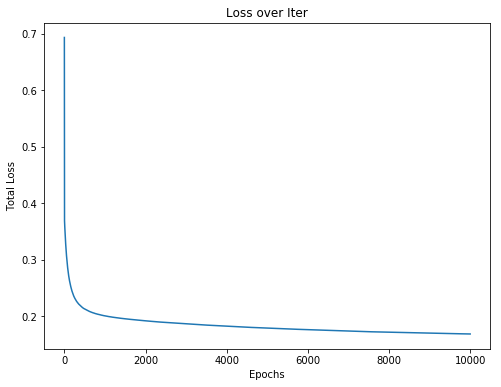

In [12]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title('Loss over Iter');

#### 2

In [14]:
lambd = .01
learning_rate = 1e-2
epochs = 500
ver_iter = epochs * .1

loss_history, w = sgd_train(X_train, y_train, epochs, learning_rate, lambd, ver_iter)

Epoch : 50, Loss : 0.3698580657030119
Epoch : 100, Loss : 0.2146697022995756
Epoch : 150, Loss : 0.1929435137176931
Epoch : 200, Loss : 0.19722526517269262
Epoch : 250, Loss : 0.1847603652742698
Epoch : 300, Loss : 0.19925422543755822
Epoch : 350, Loss : 0.1832085708182152
Epoch : 400, Loss : 0.17459696452862372
Epoch : 450, Loss : 0.1730520136649206
Epoch : 500, Loss : 0.17189466700264208


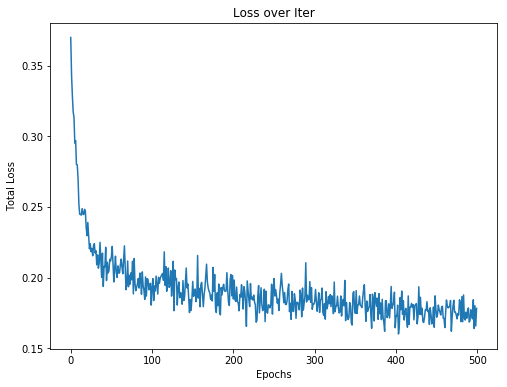

In [15]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title('Loss over Iter');

#### 4.3

Epoch : 20, Loss : 0.17202536332683607
Epoch : 40, Loss : 0.17420312633518378
Epoch : 60, Loss : 0.178943804922603
Epoch : 80, Loss : 0.18057047443112137
Epoch : 100, Loss : 0.17489356101676606
Epoch : 120, Loss : 0.16214281787409895
Epoch : 140, Loss : 0.17991705681739922
Epoch : 160, Loss : 0.17291523841888234
Epoch : 180, Loss : 0.18124420027802488
Epoch : 200, Loss : 0.1830860993719994
0.944


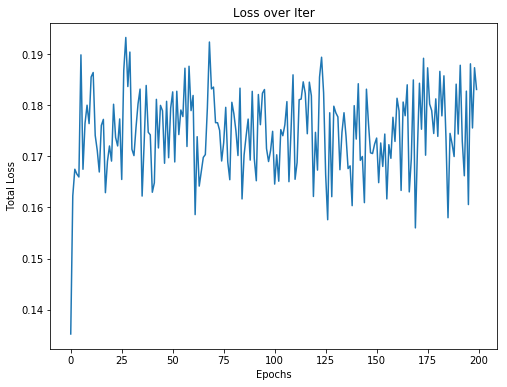

In [28]:
def sgd_train(X, y, epochs, learning_rate, lambd, ver_iter=50):
    
    w = np.zeros(X.shape[1])

    loss_history = []
    
    n = X.shape[0]
    
    for i in range(1, epochs+1):
        cost = 0
        
        learning_rate = 1 / i
        
        for j in range(n):

            p = np.random.randint(0, n)

            dat = X[[p]]
            lab = y[[p]]

            d = deriv(dat, w, lab, lambd) / n
            w  = w - learning_rate * d

            cost += loss(dat, w, lab, lambd)
            
        cost = cost / n
        
        loss_history.append(cost)
        
        if ver_iter is not None and i % ver_iter == 0:
        
            print(f'Epoch : {i}, Loss : {cost}')
            
        
    pred = predict(X_val, w)
    
    print(check_accuracy(pred, y_val))
    
    return loss_history, w


lambd = .01
learning_rate = 1
epochs = 200
ver_iter = epochs * .1

loss_history, w = sgd_train(X_train, y_train, epochs, learning_rate, lambd, ver_iter)


plt.figure(figsize=(8,6))
plt.plot(np.arange(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('Total Loss')
plt.title('Loss over Iter');

### Submission

## user : hsong1101

### score : .93288

Tried removing outliers and normalizing with min, max but not using them achieved higher accuracy.<br>
Tried different lambda values with different learning rate as well as epochs.

In [24]:
dat = sio.loadmat('./data.mat')

X = pd.DataFrame(dat['X'])
y = dat['y']

X_test, y_test = X.iloc[-200:, :], y[-200:].reshape(-1)

# X = X[(X < X.quantile(.95))].dropna()
# y = y[X.index.values]

X_train, X_val, y_train, y_val = split(np.hstack((X, y)), 500)

lambd = .05
learning_rate = 9e-04
epochs = 40000
ver_iter = epochs * .1

loss_history, w = batch_train(X_train, y_train, epochs, learning_rate, lambd, ver_iter)

print(f'Train : {check_accuracy(predict(X_train, w), y_train)}, Validation : {check_accuracy(predict(X_val, w), y_val)}')

Epoch : 4000, Loss : 0.6931471805599457
Epoch : 8000, Loss : 0.1929446852687649
Epoch : 12000, Loss : 0.18846427035212016
Epoch : 16000, Loss : 0.18723657463029525
Epoch : 20000, Loss : 0.18689324310559177
Epoch : 24000, Loss : 0.1867130345313839
Epoch : 28000, Loss : 0.1866680794857918
Epoch : 32000, Loss : 0.18662906888722158
Epoch : 36000, Loss : 0.18663123097492967
Epoch : 40000, Loss : 0.18662726976141494
Train : 0.94673, Validation : 0.934


In [25]:
print(f'Test : {check_accuracy(predict(X_test, w), y_test)}')

t = dat['X']
lab = dat['y'].reshape(-1)

check_accuracy(predict(t, w), lab)

Test : 0.955


0.94567

#### Submit

In [26]:
test = dat['X_test']

pred = predict(test, w)
pred = pred.astype(int)

sub = pd.DataFrame(pred, columns=['Category'], index=np.arange(1, len(pred)+1, 1), dtype=int)
sub.index.name = 'Id'

sub.to_csv('./submission.csv')